# sphere complex convergence

We run the single sphere LSPR problem for meshes of 512, 2048, 8192 and 32768 elements, and we present in this notebook a convergence plot.

Case for a silver sphere:

Problem parameters:

* Metal    : Silver (Ag). (In water at room temeprature)
* Radius   : 10 nm
* Wavelength: 380 nm

Values of dielectric constants obtained by interpolation:

* Water dielectric: 1.7972083599999999+8.504766399999999e-09j
* Silver dielectric: -3.3876520488233184+0.19220746083441781j

Case for a golden sphere:

Problem parameters:

* Metal    : Gold (Au). (In water at room temeprature)
* Radius   : 10 nm
* Wavelength: 520

Values of dielectric constants obtained by interpolation:

* Water dielectric: 1.7800896400000001+3.3515104000000003e-09j
* Gold dielectric: -3.8874936460215972+2.6344121588317515j

# Loading convergence test data 

In [1]:
import pickle

In [2]:
with open('../data/convergence_tests.pickle', 'rb') as f:
    results = pickle.load(f)

In [3]:
#Print results dictionary (uncomment next line to take a look at it)
#print(results)

In [4]:
N_Ag = results['sphereAg_complex']['N']
error_Ag = results['sphereAg_complex']['error']

In [5]:
N_Au = results['sphereAu_complex']['N']
error_Au = results['sphereAu_complex']['error']

In [6]:
import numpy
from matplotlib import pyplot, rcParams
from scripts.data_analysis_helper import plot_sph_complex_convergence
%matplotlib inline

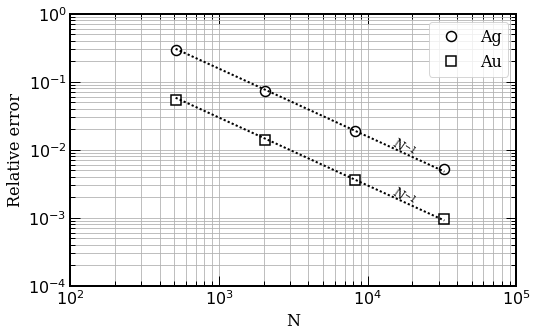

In [7]:
plot_sph_complex_convergence(N_Ag, N_Au, error_Ag, error_Au)

In [8]:
#Percentage error
perc_error_Ag = error_Ag*100
perc_error_Au = error_Au*100

print('N     % error_Ag     % error_Au ')
print('--------------------------------')
for i in range(len(N_Ag)):
    print('{}       {:.2f}%        {:.3f} %'.format(int(N_Ag[i]),
                                    perc_error_Ag[i], perc_error_Au[i]))

N     % error_Ag     % error_Au 
--------------------------------
512       29.73%        5.328 %
2048       7.32%        1.396 %
8192       1.91%        0.363 %
32768       0.52%        0.096 %


## Picking a mesh to replicate Fig 7.5  and 7.6 of C. Cooper thesis.

Considering the error analysis study made in [LSPR: Pygbe vs analytical (experimental data)](https://github.com/ncclementi/pygbe_lspr/blob/master/pygbe_vs_analytical_exp_data.ipynb) we will use meshes of 8192 elements to perform the replication for the case of silver and one of 2048 elements for gold case. 

In both cases we perform the convergence analysis for a wavelength in the zone of were the error has a peak. Taking in to account that we want to have an error $<5\%$, we considere safe options picking  ~8K elements for silver, and ~2k for gold. 